In [484]:
import marvelous

# Your own config file to keep your private key local and secret
public_key = '1f903fde09e78b25f944e1f0cccb0015'
private_key = '1ca25fd15a05c2b52e7e2700ce1820263eb10e78'
comics_list =[]

# Authenticate with Marvel, with keys I got from http://developer.marvel.com/
m = marvelous.api(public_key, private_key)

# Get all comics from this week, sorted alphabetically by title
pulls = sorted(m.comics({
    'format': "comic",
    'formatType': "comic",
    'noVariants': True,
    'dateDescriptor': "thisWeek",
    'limit': 100}),
    key=lambda comic: comic.title)

pulls1 = sorted(m.comics({
    'dateDescriptor': "thisMonth",
    #'characterList':True,
    'limit': 100}),
    key=lambda comic: comic.title)

for comic in pulls1:
    # Write a line to the file with the name of the issue, and the
    # id of the series
    print('{} (series #{})'.format(comic.title, comic.series.id))

ABSOLUTE CARNAGE: SEPARATION ANXIETY 1 (2019) #1 (series #27636)
AGE OF X-MAN: NEXTGEN TPB (Trade Paperback) (series #26372)
AGE OF X-MAN: THE AMAZING NIGHTCRAWLER TPB (Trade Paperback) (series #26373)
AGE OF X-MAN: THE MARVELOUS X-MEN TPB (Trade Paperback) (series #26371)
AGE OF X-MAN: X-TREMISTS TPB (Trade Paperback) (series #26374)
AMAZING SPIDER-MAN: VENOM 3D 1 (2019) #1 (series #27913)
ASGARDIANS OF THE GALAXY VOL. 2: WAR OF THE REALMS TPB (Trade Paperback) (series #26672)
Absolute Carnage (2019) #1 (Variant) (series #27272)
Absolute Carnage (2019) #2 (series #27272)
Absolute Carnage Vs. Deadpool (2019) #1 (series #27720)
Absolute Carnage: Lethal Protectors (2019) #1 (series #27633)
Absolute Carnage: Miles Morales (2019) #1 (series #27634)
Absolute Carnage: Scream (2019) #1 (series #27635)
Age of Conan: Valeria (2019) #1 (series #27222)
Agents of Atlas (2019) #1 (Variant) (series #27624)
Avengers (2018) #23 (series #24229)
Black Panther (2018) #15 (series #24291)
CAPTAIN MARVEL VO

In [487]:
for comic in pulls:
    # Write a line to the file with the name of the issue, and the
    # id of the series
    print('{} (series #{})'.format(comic.dates, comic.series.id))

<marvelous.dates.Dates object at 0x000001C0AA9DC4E0> (series #27272)
<marvelous.dates.Dates object at 0x000001C0AA9DC978> (series #27979)
<marvelous.dates.Dates object at 0x000001C0AA9CADA0> (series #27392)
<marvelous.dates.Dates object at 0x000001C0AA9DC780> (series #27624)
<marvelous.dates.Dates object at 0x000001C0AA9DC198> (series #27314)
<marvelous.dates.Dates object at 0x000001C0AA990E48> (series #26592)
<marvelous.dates.Dates object at 0x000001C0AA9DC240> (series #26922)
<marvelous.dates.Dates object at 0x000001C0AA9CAA90> (series #26080)
<marvelous.dates.Dates object at 0x000001C0AA9DC400> (series #25987)
<marvelous.dates.Dates object at 0x000001C0AA9CAE80> (series #27824)
<marvelous.dates.Dates object at 0x000001C0AA9CACC0> (series #26338)
<marvelous.dates.Dates object at 0x000001C0AA9DC6A0> (series #24278)
<marvelous.dates.Dates object at 0x000001C0AA9CAF60> (series #26683)
<marvelous.dates.Dates object at 0x000001C0AA9DC5C0> (series #26892)
<marvelous.dates.Dates object at 0

In [478]:
import pandas as pd
df = pd.DataFrame()

In [479]:

for comic, i in zip(pulls1,range(0,len(pulls1))):
    df.loc[i,'dates'] = comic.dates.on_sale
    df.loc[i,'diamond_code'] = comic.diamond_code
    df.loc[i,'format'] = comic.format
    df.loc[i,'page_count'] = comic.page_count
    df.loc[i,'series_id'] = comic.series.id
    df.loc[i,'title'] = comic.title


In [488]:
df

,dates,diamond_code,format,page_count,series_id,title
0,2019-08-14,JUN190809,Comic,40.0,27636.0,ABSOLUTE CARNAGE: SEPARATION ANXIETY 1 (2019) #1
1,2019-08-21,MAY190972,Trade Paperback,112.0,26372.0,AGE OF X-MAN: NEXTGEN TPB (Trade Paperback)
2,2019-08-28,JUN191062,Trade Paperback,112.0,26373.0,AGE OF X-MAN: THE AMAZING NIGHTCRAWLER TPB (Tr...
3,2019-08-21,MAY190971,Trade Paperback,192.0,26371.0,AGE OF X-MAN: THE MARVELOUS X-MEN TPB (Trade P...
4,2019-08-28,JUN190931,Comic,48.0,27913.0,AMAZING SPIDER-MAN: VENOM 3D 1 (2019) #1
5,2019-08-14,MAY190961,Trade Paperback,112.0,26672.0,ASGARDIANS OF THE GALAXY VOL. 2: WAR OF THE RE...
6,2019-08-07,JUN190761,Comic,72.0,27272.0,Absolute Carnage (2019) #1
7,2019-08-07,JUN190770,Comic,72.0,27272.0,Absolute Carnage (2019) #1 (Variant)
8,2019-08-07,JUN190772,Comic,72.0,27272.0,Absolute Carnage (2019) #1 (Variant)
9,2019-08-07,MAY198762,Comic,72.0,27272.0,Absolute Carnage (2019) #1 (Variant)


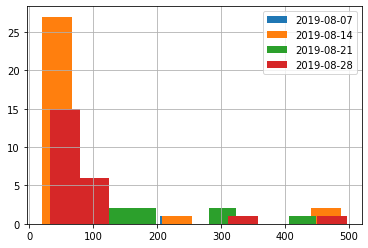

In [501]:
import matplotlib.pyplot as plt
df.groupby('dates').page_count.hist()
plt.legend(list(df.groupby('dates').groups.keys()))
plt.show()

In [500]:
list(df.groupby('').groups.keys())

[datetime.date(2019, 8, 7),
 datetime.date(2019, 8, 14),
 datetime.date(2019, 8, 21),
 datetime.date(2019, 8, 28)]

In [32]:
from marvel import Marvel

In [502]:
df1 = pd.get_dummies(df['format'])

In [505]:
df= df.drop(columns = ['format'])

In [506]:
df = pd.concat([df,df1],axis =1)

In [521]:
df.head()

,dates,diamond_code,page_count,series_id,title,Comic,Digital Comic,Hardcover,Poster Book,Trade Paperback
0,2019-08-14,JUN190809,40.0,27636.0,ABSOLUTE CARNAGE: SEPARATION ANXIETY 1 (2019) #1,1,0,0,0,0
1,2019-08-21,MAY190972,112.0,26372.0,AGE OF X-MAN: NEXTGEN TPB (Trade Paperback),0,0,0,0,1
2,2019-08-28,JUN191062,112.0,26373.0,AGE OF X-MAN: THE AMAZING NIGHTCRAWLER TPB (Tr...,0,0,0,0,1
3,2019-08-21,MAY190971,192.0,26371.0,AGE OF X-MAN: THE MARVELOUS X-MEN TPB (Trade P...,0,0,0,0,1
4,2019-08-28,JUN190931,48.0,27913.0,AMAZING SPIDER-MAN: VENOM 3D 1 (2019) #1,1,0,0,0,0


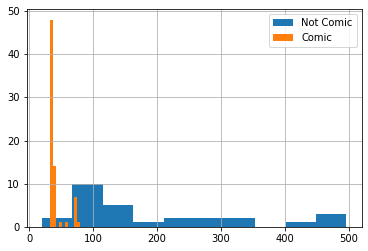

In [526]:
df.groupby('Comic').page_count.hist()
plt.legend(['Not Comic','Comic'])
plt.show()

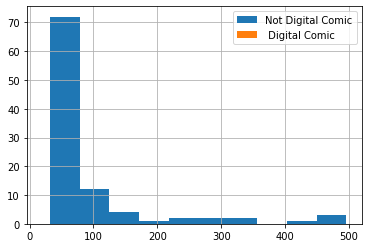

In [524]:
df.groupby('Digital Comic').page_count.hist()
plt.legend(['Not Digital Comic',' Digital Comic'])
plt.show()

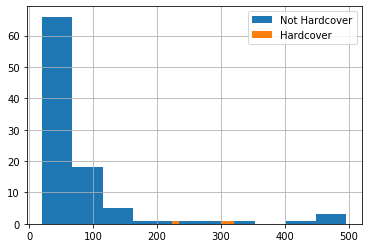

In [534]:
df.groupby('Hardcover').page_count.hist()
plt.legend(['Not Hardcover','Hardcover'])

In [341]:
print(all_characters)

<bound method Characters.all of <marvel.modules.characters.Characters object at 0x000001C09E9F7358>>


In [348]:
li = list(characters.comics(1011334).values())

In [353]:
x = li.pop(4)
x

{'offset': 0,
 'limit': 20,
 'total': 12,
 'count': 12,
 'results': [{'id': 22506,
   'digitalId': 10949,
   'title': 'Avengers: The Initiative (2007) #19',
   'issueNumber': 19,
   'variantDescription': '',
   'description': 'Join 3-D MAN, CLOUD 9, KOMODO, HARDBALL, and heroes around America in the battle that will decide the fate of the planet and the future of the Initiative program. Will the Kill Krew Army win the day?',
   'modified': '2015-10-27T16:38:23-0400',
   'isbn': '',
   'upc': '5960606084-01911',
   'diamondCode': 'SEP082362',
   'ean': '',
   'issn': '',
   'format': 'Comic',
   'pageCount': 32,
   'textObjects': [{'type': 'issue_preview_text',
     'language': 'en-us',
     'text': 'Join 3-D MAN, CLOUD 9, KOMODO, HARDBALL, and heroes around America in the battle that will decide the fate of the planet and the future of the Initiative program. Will the Kill Krew Army win the day?'},
    {'type': 'issue_solicit_text',
     'language': 'en-us',
     'text': 'SECRET INVASI

In [279]:
for x in character['data']['results']:
    print(x)

{'id': 1010901, 'name': 'Stephen Strange', 'description': '', 'modified': '1969-12-31T19:00:00-0500', 'thumbnail': {'path': 'http://i.annihil.us/u/prod/marvel/i/mg/b/40/image_not_available', 'extension': 'jpg'}, 'resourceURI': 'http://gateway.marvel.com/v1/public/characters/1010901', 'comics': {'available': 9, 'collectionURI': 'http://gateway.marvel.com/v1/public/characters/1010901/comics', 'items': [{'resourceURI': 'http://gateway.marvel.com/v1/public/comics/359', 'name': 'Captain America (2002) #19'}, {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/280', 'name': 'Captain America (2002) #20'}, {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/21715', 'name': 'New Avengers (2004) #44'}, {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/834', 'name': 'Strange (2004) #1'}, {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/913', 'name': 'Strange (2004) #2'}, {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/1469', 'name': 'Strange (2004)

In [78]:
for x in character['data']:
    print(x)

offset
limit
total
count
results


In [82]:
for x in character['data']['results']:


{'id': 1011348, 'name': 'Ricochet', 'description': '', 'modified': '1969-12-31T19:00:00-0500', 'thumbnail': {'path': 'http://i.annihil.us/u/prod/marvel/i/mg/b/40/image_not_available', 'extension': 'jpg'}, 'resourceURI': 'http://gateway.marvel.com/v1/public/characters/1011348', 'comics': {'available': 1, 'collectionURI': 'http://gateway.marvel.com/v1/public/characters/1011348/comics', 'items': [{'resourceURI': 'http://gateway.marvel.com/v1/public/comics/65266', 'name': 'Ben Reilly: Scarlet Spider (2017) #12'}], 'returned': 1}, 'series': {'available': 1, 'collectionURI': 'http://gateway.marvel.com/v1/public/characters/1011348/series', 'items': [{'resourceURI': 'http://gateway.marvel.com/v1/public/series/23021', 'name': 'Ben Reilly: Scarlet Spider (2017 - Present)'}], 'returned': 1}, 'stories': {'available': 1, 'collectionURI': 'http://gateway.marvel.com/v1/public/characters/1011348/stories', 'items': [{'resourceURI': 'http://gateway.marvel.com/v1/public/stories/141638', 'name': 'cover fr

In [94]:
z = character['data']['results']

In [98]:
z[0]

{'id': 1010901,
 'name': 'Stephen Strange',
 'description': '',
 'modified': '1969-12-31T19:00:00-0500',
 'thumbnail': {'path': 'http://i.annihil.us/u/prod/marvel/i/mg/b/40/image_not_available',
  'extension': 'jpg'},
 'resourceURI': 'http://gateway.marvel.com/v1/public/characters/1010901',
 'comics': {'available': 9,
  'collectionURI': 'http://gateway.marvel.com/v1/public/characters/1010901/comics',
  'items': [{'resourceURI': 'http://gateway.marvel.com/v1/public/comics/359',
    'name': 'Captain America (2002) #19'},
   {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/280',
    'name': 'Captain America (2002) #20'},
   {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/21715',
    'name': 'New Avengers (2004) #44'},
   {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/834',
    'name': 'Strange (2004) #1'},
   {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/913',
    'name': 'Strange (2004) #2'},
   {'resourceURI': 'http://gateway.marvel.com/

In [99]:
dict(z)

ValueError: dictionary update sequence element #0 has length 11; 2 is required

In [100]:
z[0]

{'id': 1010901,
 'name': 'Stephen Strange',
 'description': '',
 'modified': '1969-12-31T19:00:00-0500',
 'thumbnail': {'path': 'http://i.annihil.us/u/prod/marvel/i/mg/b/40/image_not_available',
  'extension': 'jpg'},
 'resourceURI': 'http://gateway.marvel.com/v1/public/characters/1010901',
 'comics': {'available': 9,
  'collectionURI': 'http://gateway.marvel.com/v1/public/characters/1010901/comics',
  'items': [{'resourceURI': 'http://gateway.marvel.com/v1/public/comics/359',
    'name': 'Captain America (2002) #19'},
   {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/280',
    'name': 'Captain America (2002) #20'},
   {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/21715',
    'name': 'New Avengers (2004) #44'},
   {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/834',
    'name': 'Strange (2004) #1'},
   {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/913',
    'name': 'Strange (2004) #2'},
   {'resourceURI': 'http://gateway.marvel.com/

In [102]:
type(characters.comics(1011334))

dict

In [103]:
zz = characters.comics(1011334)

In [105]:
for i in zz:
    print(i)

code
status
copyright
attributionText
attributionHTML
etag
data


In [106]:
for i in zz['data']:
    print(i)

offset
limit
total
count
results


In [110]:
for i in zz['data']['results']:
    print(i)

{'id': 22506, 'digitalId': 10949, 'title': 'Avengers: The Initiative (2007) #19', 'issueNumber': 19, 'variantDescription': '', 'description': 'Join 3-D MAN, CLOUD 9, KOMODO, HARDBALL, and heroes around America in the battle that will decide the fate of the planet and the future of the Initiative program. Will the Kill Krew Army win the day?', 'modified': '2015-10-27T16:38:23-0400', 'isbn': '', 'upc': '5960606084-01911', 'diamondCode': 'SEP082362', 'ean': '', 'issn': '', 'format': 'Comic', 'pageCount': 32, 'textObjects': [{'type': 'issue_preview_text', 'language': 'en-us', 'text': 'Join 3-D MAN, CLOUD 9, KOMODO, HARDBALL, and heroes around America in the battle that will decide the fate of the planet and the future of the Initiative program. Will the Kill Krew Army win the day?'}, {'type': 'issue_solicit_text', 'language': 'en-us', 'text': 'SECRET INVASION Tie-In!\r<br>"V-S DAY"\r<br>It\'s been leading to this since the Hank Pym Skrull first came up with the idea for a Fifty State Initi

In [119]:
zz = str(zz['data']['results'])

In [165]:
result = [x.strip() for x in zz.split(',')]

In [122]:
result

["[{'id': 22506",
 "'digitalId': 10949",
 "'title': 'Avengers: The Initiative (2007) #19'",
 "'issueNumber': 19",
 "'variantDescription': ''",
 "'description': 'Join 3-D MAN",
 'CLOUD 9',
 'KOMODO',
 'HARDBALL',
 "and heroes around America in the battle that will decide the fate of the planet and the future of the Initiative program. Will the Kill Krew Army win the day?'",
 "'modified': '2015-10-27T16:38:23-0400'",
 "'isbn': ''",
 "'upc': '5960606084-01911'",
 "'diamondCode': 'SEP082362'",
 "'ean': ''",
 "'issn': ''",
 "'format': 'Comic'",
 "'pageCount': 32",
 "'textObjects': [{'type': 'issue_preview_text'",
 "'language': 'en-us'",
 "'text': 'Join 3-D MAN",
 'CLOUD 9',
 'KOMODO',
 'HARDBALL',
 "and heroes around America in the battle that will decide the fate of the planet and the future of the Initiative program. Will the Kill Krew Army win the day?'}",
 "{'type': 'issue_solicit_text'",
 "'language': 'en-us'",
 '\'text\': \'SECRET INVASION Tie-In!\\r<br>"V-S DAY"\\r<br>It\\\'s been le

In [123]:
type(result)

list

In [124]:
result[1]

"'digitalId': 10949"

ValueError: dictionary update sequence element #0 has length 13; 2 is required

In [139]:
{result[3].split(':')[0]:result[3].split(':')[1]}

{"'issueNumber'": ' 19'}

In [143]:
[{x.split(':')[0],x.split(':')[1]} for x in result]

IndexError: list index out of range

In [171]:
i=0
val =[]
for x in result:
    if(len(x.split(':'))==2):
        print(len(x.split(':')),i)
        val.append(result[i])
    i=i+1

2 0
2 1
2 3
2 4
2 5
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 19
2 20
2 25
2 26
2 27
2 39
2 41
2 43
2 47
2 48
2 49
2 52
2 54
2 56
2 59
2 60
2 61
2 63
2 65
2 69
2 70
2 72
2 73
2 75
2 76
2 78
2 79
2 81
2 82
2 84
2 85
2 87
2 88
2 90
2 91
2 93
2 94
2 95
2 99
2 101
2 103
2 105
2 107
2 109
2 111
2 113
2 114
2 119
2 122
2 123
2 127
2 128
2 129
2 130
2 132
2 133
2 134
2 138
2 139
2 140
2 141
2 142
2 143
2 144
2 146
2 147
2 150
2 151
2 152
2 153
2 159
2 161
2 163
2 169
2 170
2 173
2 175
2 177
2 180
2 181
2 182
2 184
2 186
2 188
2 192
2 193
2 195
2 196
2 198
2 199
2 201
2 202
2 204
2 205
2 207
2 208
2 210
2 211
2 212
2 216
2 218
2 220
2 222
2 224
2 226
2 228
2 230
2 232
2 234
2 236
2 238
2 239
2 244
2 247
2 248
2 252
2 253
2 254
2 255
2 257
2 258
2 259
2 260
2 264
2 265
2 266
2 267
2 268
2 269
2 270
2 272
2 273
2 274
2 284
2 285
2 288
2 291
2 293
2 295
2 297
2 301
2 302
2 304
2 305
2 307
2 308
2 310
2 311
2 313
2 314
2 316
2 317
2 319
2 320
2 322
2 323
2 324
2 328
2 330
2 332
2 334
2 336
2 338
2 340


In [187]:
x =[dict(field=x.split(':')[0],value=x.split(':')[1]) for x in val]

In [236]:
marv_dict ={}
i = 0
for x in val:
    marv_dict[x.split(':')[0].strip("'").strip('[').strip('{')+str(i)] = x.split(':')[1]
    print(x.split(':')[0].strip("'").strip('[').strip('{')+ str(i))
    i = i + 1

'id0
digitalId1
issueNumber2
variantDescription3
description4
isbn5
upc6
diamondCode7
ean8
issn9
format10
pageCount11
language12
text13
'type14
language15
text16
'type17
'type18
'type19
variants20
collections21
collectedIssues22
'type23
'type24
'type25
price26
'type27
price28
extension29
extension30
name31
role32
name33
role34
name35
role36
name37
role38
name39
role40
name41
role42
name43
role44
name45
role46
name47
role48
returned49
name50
name51
name52
name53
name54
name55
name56
name57
returned58
type59
type60
returned61
name62
returned63
'id64
digitalId65
issueNumber66
variantDescription67
description68
isbn69
upc70
diamondCode71
ean72
issn73
format74
pageCount75
language76
text77
'type78
language79
text80
can they stop the TRUE purpose of the Fifty State Initiative? Plus81
'type82
'type83
'type84
collections85
collectedIssues86
'type87
'type88
'type89
price90
'type91
price92
extension93
extension94
extension95
name96
role97
name98
role99
name100
role101
name102
role103
name104
rol

In [228]:
len(marv_dict)

680

In [157]:
result

["[{'id': 22506",
 "'digitalId': 10949",
 "'issueNumber': 19",
 "'variantDescription': ''",
 "'description': 'Join 3-D MAN",
 'KOMODO',
 "and heroes around America in the battle that will decide the fate of the planet and the future of the Initiative program. Will the Kill Krew Army win the day?'",
 "'isbn': ''",
 "'upc': '5960606084-01911'",
 "'diamondCode': 'SEP082362'",
 "'ean': ''",
 "'issn': ''",
 "'format': 'Comic'",
 "'pageCount': 32",
 "'language': 'en-us'",
 "'text': 'Join 3-D MAN",
 'KOMODO',
 "and heroes around America in the battle that will decide the fate of the planet and the future of the Initiative program. Will the Kill Krew Army win the day?'}",
 "{'type': 'issue_solicit_text'",
 "'language': 'en-us'",
 '\'text\': \'SECRET INVASION Tie-In!\\r<br>"V-S DAY"\\r<br>It\\\'s been leading to this since the Hank Pym Skrull first came up with the idea for a Fifty State Initiative.  This is the final assault in the Secret Invasion',
 'THE KILL KREW ARMY! Join 3-D MAN',
 'KOMOD

In [210]:
val

["[{'id': 22506",
 "'digitalId': 10949",
 "'issueNumber': 19",
 "'variantDescription': ''",
 "'description': 'Join 3-D MAN",
 "'isbn': ''",
 "'upc': '5960606084-01911'",
 "'diamondCode': 'SEP082362'",
 "'ean': ''",
 "'issn': ''",
 "'format': 'Comic'",
 "'pageCount': 32",
 "'language': 'en-us'",
 "'text': 'Join 3-D MAN",
 "{'type': 'issue_solicit_text'",
 "'language': 'en-us'",
 '\'text\': \'SECRET INVASION Tie-In!\\r<br>"V-S DAY"\\r<br>It\\\'s been leading to this since the Hank Pym Skrull first came up with the idea for a Fifty State Initiative.  This is the final assault in the Secret Invasion',
 "{'type': 'purchase'",
 "{'type': 'reader'",
 "{'type': 'inAppLink'",
 "'variants': []",
 "'collections': []",
 "'collectedIssues': []",
 "{'type': 'focDate'",
 "{'type': 'unlimitedDate'",
 "{'type': 'digitalPurchaseDate'",
 "'price': 2.99}",
 "{'type': 'digitalPurchasePrice'",
 "'price': 1.99}]",
 "'extension': 'jpg'}",
 "'extension': 'jpg'}]",
 "'name': 'Tom Brevoort'",
 "'role': 'editor'}

In [230]:
marv_dict['name']

KeyError: 'name'

In [216]:
print(len(marv_dict))

37


In [219]:
print(len(val))

680


In [254]:
list(marv_dict.keys())

["'id0",
 'digitalId1',
 'issueNumber2',
 'variantDescription3',
 'description4',
 'isbn5',
 'upc6',
 'diamondCode7',
 'ean8',
 'issn9',
 'format10',
 'pageCount11',
 'language12',
 'text13',
 "'type14",
 'language15',
 'text16',
 "'type17",
 "'type18",
 "'type19",
 'variants20',
 'collections21',
 'collectedIssues22',
 "'type23",
 "'type24",
 "'type25",
 'price26',
 "'type27",
 'price28',
 'extension29',
 'extension30',
 'name31',
 'role32',
 'name33',
 'role34',
 'name35',
 'role36',
 'name37',
 'role38',
 'name39',
 'role40',
 'name41',
 'role42',
 'name43',
 'role44',
 'name45',
 'role46',
 'name47',
 'role48',
 'returned49',
 'name50',
 'name51',
 'name52',
 'name53',
 'name54',
 'name55',
 'name56',
 'name57',
 'returned58',
 'type59',
 'type60',
 'returned61',
 'name62',
 'returned63',
 "'id64",
 'digitalId65',
 'issueNumber66',
 'variantDescription67',
 'description68',
 'isbn69',
 'upc70',
 'diamondCode71',
 'ean72',
 'issn73',
 'format74',
 'pageCount75',
 'language76',
 'tex

In [257]:
list(marv_dict.keys())[33],marv_dict[list(marv_dict.keys())[33]]

('name33', " 'Virtual Calligr'")

In [245]:
test_dict = { "geeks" : 7, "for" : 1, "geeks" : 2 } 


In [246]:
test_dict.keys()[1]

TypeError: 'dict_keys' object does not support indexing

In [260]:
for z in characters.comics(1011334):
    print(z)

code
status
copyright
attributionText
attributionHTML
etag
data


In [261]:
character_data_wrapper = m.get_characters(orderBy="name,-modified", limit="5", offset="15")

AttributeError: 'Marvel' object has no attribute 'get_characters'

In [264]:
from marvel.marvel import Marvel

In [263]:
character_data_wrapper = m.get_characters(orderBy="name,-modified", limit="5", offset="15")

AttributeError: 'Session' object has no attribute 'get_characters'

In [265]:
m = Marvel(public_key, private_key)

In [269]:
character_data_wrapper = m.character(orderBy="name,-modified", limit="5", offset="15")

AttributeError: 'Marvel' object has no attribute 'character'

In [267]:
dir(m)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'characters',
 'comics',
 'creators',
 'events',
 'requester',
 'series',
 'stories']

In [272]:
help(m)

Help on Marvel in module marvel.marvel object:

class Marvel(marvel.base.Base)
 |  Marvel(PUBLIC_KEY, PRIVATE_KEY)
 |  
 |  Method resolution order:
 |      Marvel
 |      marvel.base.Base
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, PUBLIC_KEY, PRIVATE_KEY)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from marvel.base.Base:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [274]:
help(type(m))

Help on class Marvel in module marvel.marvel:

class Marvel(marvel.base.Base)
 |  Marvel(PUBLIC_KEY, PRIVATE_KEY)
 |  
 |  Method resolution order:
 |      Marvel
 |      marvel.base.Base
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, PUBLIC_KEY, PRIVATE_KEY)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from marvel.base.Base:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [355]:
dir(m.comics)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'all',
 'characters',
 'creators',
 'events',
 'get',
 'r',
 'stories']

In [358]:
dir(m)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'api_url',
 'cache',
 'call',
 'comics',
 'private_key',
 'public_key',
 'series']

In [359]:
dir(m.comics)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__func__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [405]:
dir(m)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'api_url',
 'cache',
 'call',
 'comics',
 'private_key',
 'public_key',
 'series']

In [408]:
m.api_url = 'http://gateway.marvel.com:80/v1/public/characters'

In [407]:
dir(m.call)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__func__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [410]:
m.api_url

'http://gateway.marvel.com:80/v1/public/{}'

In [430]:
api_response = m.call(
  ['characters',1011023, 'comics'],
  {'dateDescriptor': 'thisMonth', 'limit': 50 })

In [428]:
dir(api_response)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [431]:
api_response.values()

dict_values([200, 'Ok', '© 2019 MARVEL', 'Data provided by Marvel. © 2019 MARVEL', '<a href="http://marvel.com">Data provided by Marvel. © 2019 MARVEL</a>', 'f4da633f4e853e30584f94cb1727f9edf3907c08', {'offset': 0, 'limit': 50, 'total': 0, 'count': 0, 'results': []}])